### DEEP LEARNING - ASSIGNMENT 2

### AYUSH BISEN - 21105025

##### First of all, let us import all the training images from the folder 'train'.Since the images in the train folder are of varying sizes, first of all we will have to reshape each image to a size of (img_size,img_size).Here img_size is a paramter which we can vary and cross check for better results.  Each of the image is then reshaped as a column vector of length (1,img_ size*img_size).In the training dataset we have 25000 images of which first 12500 are of cats and later 12500 are of dogs.

In [1]:

%matplotlib notebook
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from mpl_toolkits import mplot3d
import glob


path1 = glob.glob('train/*.jpg')
img_size=10  # img_size refers to the size of any particular image after it is reshaped. For better accuracy, we can use higher img_size but at the cost of additional computational cost.
img_count=1000  # img_count represents number of dog or cat images to be considered. For using full dataset, kindly take img_count as 12500.

X=np.zeros([img_size*img_size,25000])
x=np.zeros([img_size*img_size,2*img_count])
    
IMG = []
for img in (path1):
    ind_img = cv.imread(img)
    ind_img=cv.resize(ind_img,(img_size,img_size))
    ind_img=np.mean(ind_img,-1)
    IMG.append(ind_img)
IMG=np.array(IMG)

for i in range(25000):
    X[:,i]=IMG[i,:,:].reshape(img_size*img_size)

x[:,:img_count]=X[:,:img_count]
x[:,img_count:]=X[:,12500:12500+img_count]



<IPython.core.display.Javascript object>


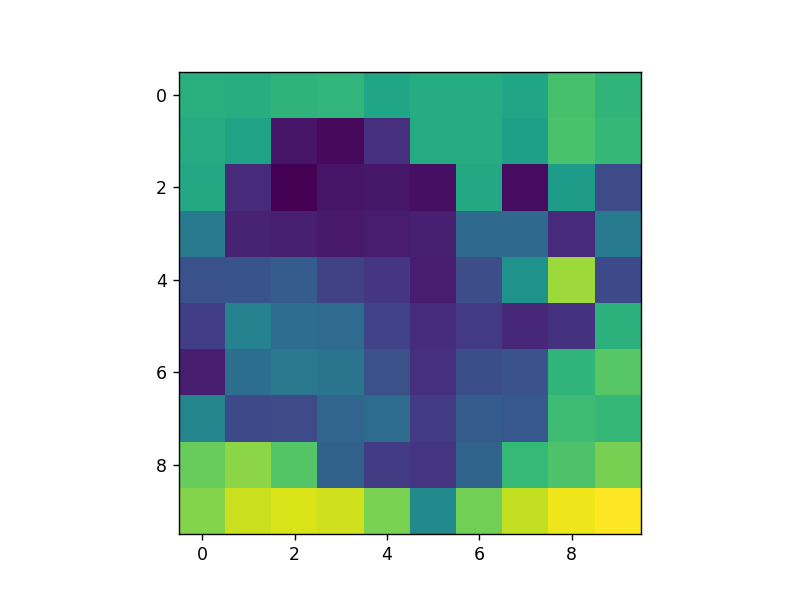

In [2]:
plt.figure()
img=plt.imshow(x[:,10].reshape(img_size,img_size))
plt.show()

## DATA UNDERSTANDING
#### Now we will try to understand how the cat and dog image are distributed along a 3d plot. For the 3 coordinate axes ,we will be using 3 Eigen Vectors of training dataset('x'). Optimally the three eigen vectors should be the ones which can best separate out the data points for cats and dogs. Now, let us see if we are able to find a possible line of separation visually using these eigen vectors.

<IPython.core.display.Javascript object>


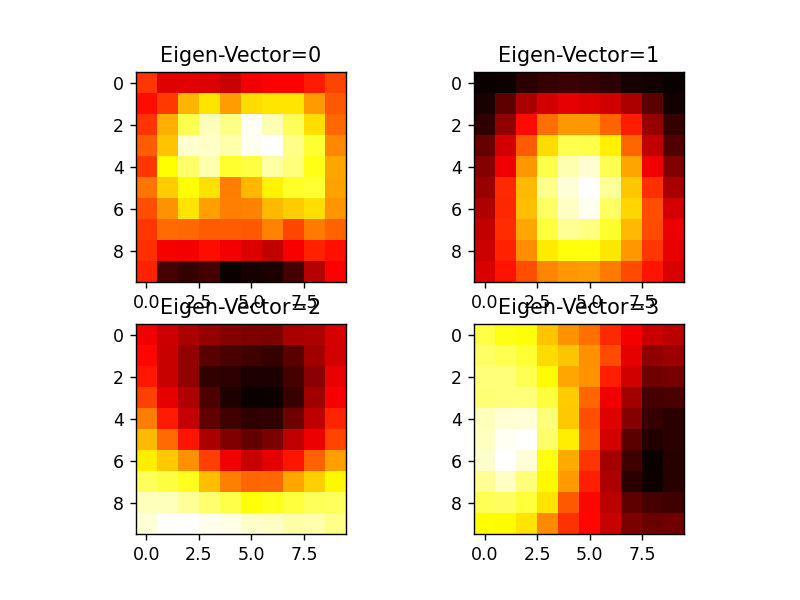

<IPython.core.display.Javascript object>


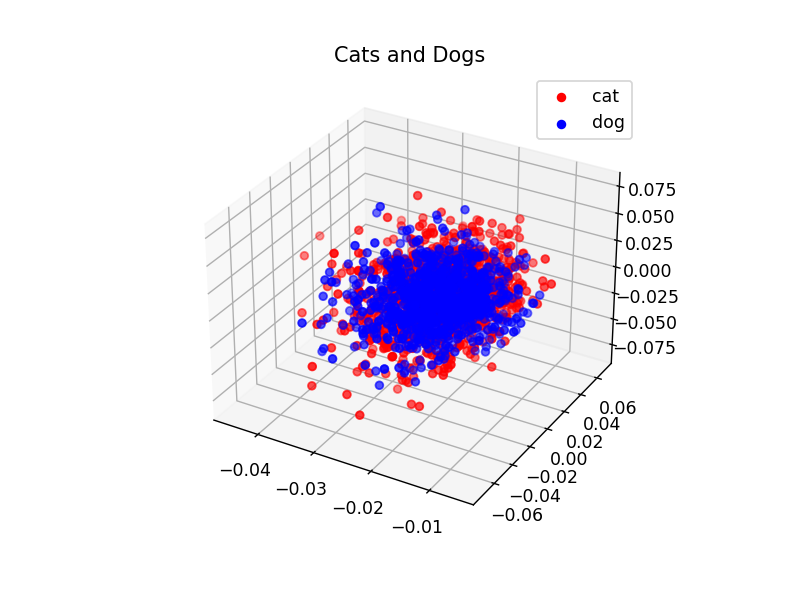

In [3]:
U,S,VT=np.linalg.svd(x,full_matrices=False)

plt.figure()
for i in range(4):
    
    plt.subplot(2,2,i+1)
    plt.title('Eigen-Vector='+str(i))
    img=plt.imshow(U[:,i].reshape(img_size,img_size),cmap='hot')


plt.figure()

eigen_vector_1=0
eigen_vector_2=1
eigen_vector_3=6

ax = plt.axes(projection ='3d')
ax.scatter3D(VT[eigen_vector_1,:img_count], VT[eigen_vector_2,:img_count], VT[eigen_vector_3,:img_count], color='red',label='cat')
ax.scatter3D(VT[eigen_vector_1,img_count:], VT[eigen_vector_2,img_count:], VT[eigen_vector_3,img_count:], color='blue',label='dog')
ax.legend()
ax.set_title('Cats and Dogs')
plt.show()


#### Unfortunately for whatever combination of eigen vectors we try, we dont seem to finding a visually clear separation of cats and dogs data.Since the cat and dog data points are clustered together with no clear separation between them ,we can expect linear SVC classifier to face some difficulty in deciding the separation line.Thus we will use non-linear SVC classifier which can hopefully classify cats and dogs dataset .Let us see how well our models respond to such a dataset.

In [4]:
#from keras_tqdm import TQDMNotebookCallback
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import NuSVC

label=np.zeros(2*img_count)
label[img_count:]=1

X_train,X_test,Y_train,Y_test=train_test_split(x.T,label,test_size=0.30,random_state=40)

scaler = sklearn.preprocessing.StandardScaler()
normalizer = sklearn.preprocessing.Normalizer()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


C:\Users\ayush\miniconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<IPython.core.display.Javascript object>


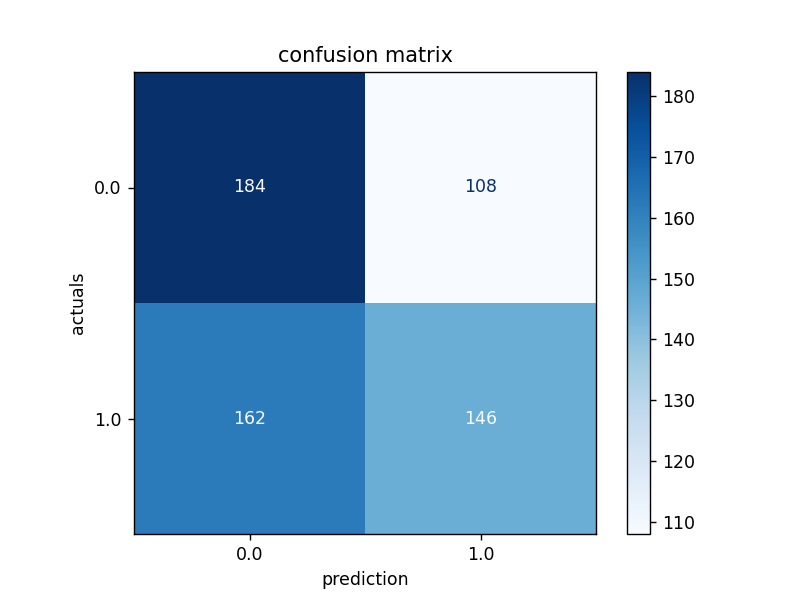

Mean accuracy of KNN model is 0.5071428571428572 and standard deviation is 0.04015276949301485


In [5]:
model=KNeighborsClassifier()
model.fit(X_train,Y_train)
kfold=StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
cv_results=cross_val_score(model,X_train,Y_train,cv=kfold,scoring='accuracy')

plot_confusion_matrix(model, X_test, Y_test,cmap='Blues' )  
plt.xlabel('prediction')
plt.ylabel('actuals')
plt.title('confusion matrix')
plt.show()

print('Mean accuracy of KNN model is',cv_results.mean(),'and standard deviation is',cv_results.std())

In [6]:
#model=SVC(gamma='auto',C=0.4)
model=NuSVC(gamma='auto')
model.fit(X_train,Y_train)
kfold=StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
cv_results=cross_val_score(model,X_train,Y_train,cv=kfold,scoring='accuracy')

plot_confusion_matrix(model, X_test, Y_test,cmap='Blues' )
plt.xlabel('prediction')
plt.ylabel('actuals')
plt.title('confusion matrix')
plt.show()

print('Mean accuracy of SVC model is',cv_results.mean(),'and standard deviation is',cv_results.std())

TypeError: __init__() got an unexpected keyword argument 'C'

In [ ]:
model=LogisticRegression()
model.fit(X_train,Y_train)
kfold=StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
cv_results=cross_val_score(model,X_train,Y_train,cv=kfold,scoring='accuracy')

plot_confusion_matrix(model, X_test, Y_test,cmap='Blues' )
plt.xlabel('prediction')
plt.ylabel('actuals')
plt.title('confusion matrix')
plt.show()

print('Mean accuracy of LogisticRgression model is',cv_results.mean(),'and standard deviation is',cv_results.std())